In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
#Data path
data_path_train="../input/house-prices-advanced-regression-techniques/train.csv"

# Read the data
X_full = pd.read_csv("train.csv", index_col='Id')
X_test_full = pd.read_csv("test.csv", index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

# Possible are for droping unneccesary feature columns
X_full=X_full.drop(columns=["GarageYrBlt"])
X_test_full=X_test_full.drop(columns=["GarageYrBlt"])
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_full.columns if
                    X_full[cname].nunique() < 10 and 
                    X_full[cname].dtype == "object"]
numerical_cols = [cname for cname in X_full.columns if 
                X_full[cname].dtype in ['int64', 'float64']]

# FillNA part
X_full[categorical_cols]=X_full[categorical_cols].fillna('NA',axis=1)
X_test_full[categorical_cols]=X_test_full[categorical_cols].fillna('NA',axis=1)
X_full[numerical_cols]=X_full[numerical_cols].fillna(0, axis=1)
X_test_full[numerical_cols]=X_test_full[numerical_cols].fillna(0, axis=1)

# Keep selected columns only
my_cols = categorical_cols + numerical_cols



X=X_full[my_cols]

X_test=X_test_full[my_cols]
#split train set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()
X_test = X_test[my_cols].copy()
#Encoding categorical data with help of Pandas Get_dummies
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [4]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,56.605308,56.978596,10589.672945,6.086473,5.572774,1970.890411,1984.692637,102.949486,439.890411,45.571918,...,0.004281,0.082192,0.001712,0.872432,0.067637,0.002568,0.005993,0.010274,0.829623,0.083904
std,42.172322,33.932849,10704.180793,1.367472,1.116908,30.407486,20.684612,182.356257,435.106803,156.229962,...,0.065316,0.274774,0.041363,0.333752,0.251230,0.050637,0.077216,0.100882,0.376124,0.277363
min,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,41.750000,7589.500000,5.000000,5.000000,1953.750000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,62.000000,9512.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,379.500000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.250000,716.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1120.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error


# Define the model
model = XGBRegressor(n_estimators=500,learning_rate=0.05,random_state=0) # Your code here

# Fit the model
model.fit(X_train,y_train,early_stopping_rounds=5,eval_set=[(X_valid, y_valid)]) # Your code here

[15:40:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:190317
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:181638
[2]	validation_0-rmse:173425
[3]	validation_0-rmse:165397
[4]	validation_0-rmse:158114
[5]	validation_0-rmse:150922
[6]	validation_0-rmse:144276
[7]	validation_0-rmse:137733
[8]	validation_0-rmse:131708
[9]	validation_0-rmse:125877
[10]	validation_0-rmse:120480
[11]	validation_0-rmse:115234
[12]	validation_0-rmse:110358
[13]	validation_0-rmse:105695
[14]	validation_0-rmse:101643
[15]	validation_0-rmse:97530
[16]	validation_0-rmse:93467.8
[17]	validation_0-rmse:89727.4
[18]	validation_0-rmse:86265.2
[19]	validation_0-rmse:83251.3
[20]	validation_0-rmse:80105.2
[21]	validation_0-rmse:77433.9
[22]	validation_0-rmse:74818.3
[23]	validation_0-rmse:72187.7
[24]	validation_0-rmse:69908.7
[25]	validation_0-rmse:67665.8
[26]	validation_0-rmse:65499.6

XGBRegressor(learning_rate=0.05, n_estimators=500)

In [6]:
# Get predictions
predictions = model.predict(X_valid) # Your code here

# Calculate MAE
mae2 = mean_squared_log_error(predictions, y_valid) # Your code here

# Uncomment to print MAE
print("Mean Absolute Error:" , (mae2)**.5)

Mean Absolute Error: 0.13293993236145107


<Figure size 648x432 with 0 Axes>

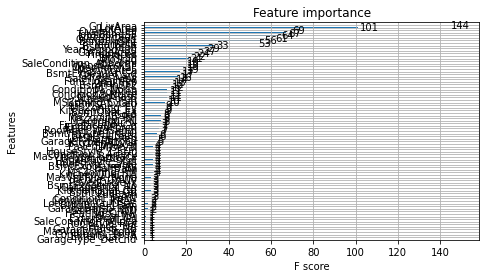

In [7]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from xgboost import plot_importance
fig1=plt.gcf().set_size_inches(9,6)

plot_importance(model)

plt.draw()

In [8]:
preds_test = model.predict(X_test)
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)
output.head()

,Id,SalePrice
0,1461,118890.468750
1,1462,164167.953125
2,1463,183269.140625
3,1464,184626.140625
4,1465,198173.703125
